In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely
import plotly.express as px
from matplotlib import pyplot as plt

In [19]:
### """constants"""

earth_radius = 6371000 # earth radius in meters
earth_circumference = 2 * np.pi * earth_radius # earth circumference in meters
# define earth map as rectangle
earth_max_x = earth_circumference
earth_max_y = earth_circumference / 2

satellite_fov = 1.72 # field of view of the satellite in degrees
satellite_distance = 500000 # distance of the satellite in meters
"""
             [_] # satellite position
            /.|.\  
           /..|..\ 
          /...z...v 
         /....|....\ # satellite fov
        /-----|-----\ 
       |<-----d----->| # satellite view area on earth => satellite_view_area = d = 2 * tan(satellite_fov/2) * satellite_distance
"""
satellite_fov_rad = satellite_fov * np.pi / 180 # satellite fov in radians
satellite_view = 2 * np.tan(satellite_fov_rad/2) * satellite_distance
print(satellite_view)
satellite_view_rounded = 10**len(str(int(np.fix(satellite_view)))) # scale view area in meters
scale_view = satellite_view / 5 # scale view area in meters
grid_size = scale_view # grid size in meters

15010.95888229557


In [20]:
print(grid_size)
grids_number_x = int(earth_max_x / grid_size) # number of grids in x direction
grids_number_y = int(earth_max_y / grid_size) # number of grids in y direction
print(earth_circumference)
print(earth_max_x, earth_max_y)
print(grids_number_x, grids_number_y)

3002.191776459114
40030173.59204114
40030173.59204114 20015086.79602057
13333 6666


In [6]:
# read csv data
df = pd.read_csv('../data/satellite-data.csv')
df.head()

,Time (UTCG),Lat (deg),Lon (deg),Alt (km),Lat Rate (deg/sec),Lon Rate (deg/sec),Alt Rate (km/sec)
0,15 Aug 2022 07:30:00.000,-0.000,-76.191,500.000000,0.052270,0.032195,-0.000000
1,15 Aug 2022 07:31:00.000,3.137,-74.260,500.063524,0.052230,0.032303,0.002113
2,15 Aug 2022 07:32:00.000,6.269,-72.315,500.252976,0.052110,0.032628,0.004189
3,15 Aug 2022 07:33:00.000,9.391,-70.344,500.564986,0.051906,0.033177,0.006191
4,15 Aug 2022 07:34:00.000,12.498,-68.333,500.994006,0.051615,0.033960,0.008082


In [7]:
df_columns_org = list(df.columns)
df_columns_org

df.drop(df_columns_org[3:], axis=1, inplace=True)
df.head()

,Time (UTCG),Lat (deg),Lon (deg)
0,15 Aug 2022 07:30:00.000,-0.000,-76.191
1,15 Aug 2022 07:31:00.000,3.137,-74.260
2,15 Aug 2022 07:32:00.000,6.269,-72.315
3,15 Aug 2022 07:33:00.000,9.391,-70.344
4,15 Aug 2022 07:34:00.000,12.498,-68.333


In [8]:
df.shape

(1441, 3)

In [9]:
# df columns name => "Time (UTCG)","Lat (deg)","Lon (deg)"
fig = px.scatter_geo(df,lat="Lat (deg)", lon="Lon (deg)",hover_name="Time (UTCG)")
fig.update_layout(title = 'Satelite Movement', title_x=0.5)
fig.show()

In [28]:
SCALE = 10
MAX_X = 360*SCALE
MAX_Y = 180*SCALE

In [29]:
earth_map = np.zeros((MAX_X, MAX_Y), dtype=int)


In [30]:
print(earth_map.shape)

(3600, 1800)


In [31]:
def plot_earth_map(earth_map):
    plt.matshow(earth_map, cmap='gray')
    plt.xlim(0,MAX_X)
    plt.ylim(0,MAX_Y)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # 
    plt.show()

In [32]:
def fill_around_point(earth_map,point,limit):
    for i in range(point[0]-limit,point[0]+limit):
        for j in range(point[1]-limit,point[1]+limit):
            # print(i,j)
            if(i>=0 and i<MAX_X and j>=0 and j<MAX_Y):
                earth_map[i,j] += 10
    return earth_map

In [33]:
# for each lat,lon in df, add 1 to the corresponding grid in earth_map
def fill_earth_map(earth_map,df):
    for index, row in df.iterrows():
        x = int(float(row['Lon (deg)'])*SCALE) + MAX_X//2
        y = int(float(row['Lat (deg)'])*SCALE) + MAX_Y//2
        # print(index,x,y)
        earth_map = fill_around_point(earth_map,(x,y),25)


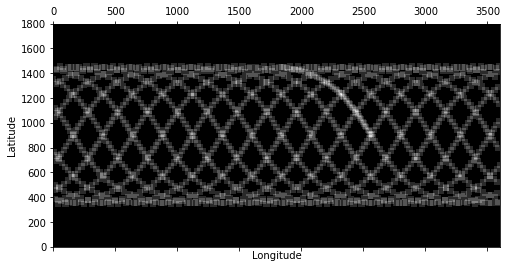

In [34]:
fill_earth_map(earth_map,df)
rotated = np.rot90(earth_map,3)
plot_earth_map(rotated)

In [35]:
def get_hot_points(earth_map,limit):
    hot_points = []
    for i in range(MAX_X):
        for j in range(MAX_Y):
            if(earth_map[i,j]>limit):
                hot_points.append((i,j))
    return hot_points

def get_max_point(earth_map):
    max_point = (0,0)
    max_value = 0
    for i in range(MAX_X):
        for j in range(MAX_Y):
            if(earth_map[i,j]>max_value):
                max_point = (i,j)
                max_value = earth_map[i,j]
    return max_point

In [36]:
max_point = get_max_point(earth_map)
print(max_point,earth_map[max_point[0],max_point[1]])

(1156, 1091) 60
